## TASK 6P

* **Name :** M.Rachel
* **Student No. :** 224234147
* **Deakin Mail :** s224234147@deakin.edu.au
* **Email Address:** rachelriney1608@gmail.com

## PROBLEM STATEMENT
Multi Layer Perceptron implementation on MNIST dataset, that contains handwritten numbers of Images, We load from Keras builtin datasets, predicting the numbers using TensorFlow Framework.

In [1]:
#Importing Necessary libraries
import matplotlib.pyplot as plt #Data Visualization
from keras.layers import Dense, Flatten # For creating the Neural Network Layers
from keras.models import Sequential # For creating a Sequential Model
from keras.utils import to_categorical # For converting the image labels to one-hot encoding values
from keras.datasets import mnist # Loading the MNIST dataset from keras
from keras import utils #For utility function

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the MNIST dataset
from keras.datasets import mnist

# Loading the dataset into training and testing set
(X_train,y_train),(X_test, y_test)=mnist.load_data()

In [3]:
# Checking the shape of y_test array for understanding the size of shape of testing set labels
y_test.shape

(10000,)

In [4]:
# Checking the shape of the X_train for understanding the training set samples and its dimensions
X_train.shape


(60000, 28, 28)

* There are 10000 labels at the testing set
* There are 60000 training samples with 28 height and 28 width in training set

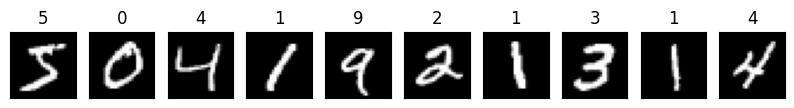

In [5]:
# Plotting first 10 images of the dataset
fig,axes = plt.subplots(ncols=10,sharex=False, sharey=True, figsize=(10,4))# First 10 col images is visualized, sharex subplot is not shared, sharey is shared
# Using for loop visualizing the first 10 images
for i in range(10):
  axes[i].set_title(y_train[i])#set the title of each images with ytrain labels
  axes[i].imshow(X_train[i],cmap='gray')#Show the images from X_train with the colormap as gray
  axes[i].get_xaxis().set_visible(False)#set the xaxis should not visible in the images
  axes[i].get_yaxis().set_visible(False)#set the yaxis should not visible in the images

plt.show()


#### 2. Develop a one hidden layer multi-layer perceptron model on the above training data, report the accuracy of the model.


In [6]:
# Load the MNIST dataset

# Preprocess the data
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Checking the shape of the y_test array
print(y_test.shape)

(10000, 10)


In [10]:
# Build the MLP model with one hidden layer
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 512 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Lets observe the summary of the model and number of parameters in each layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

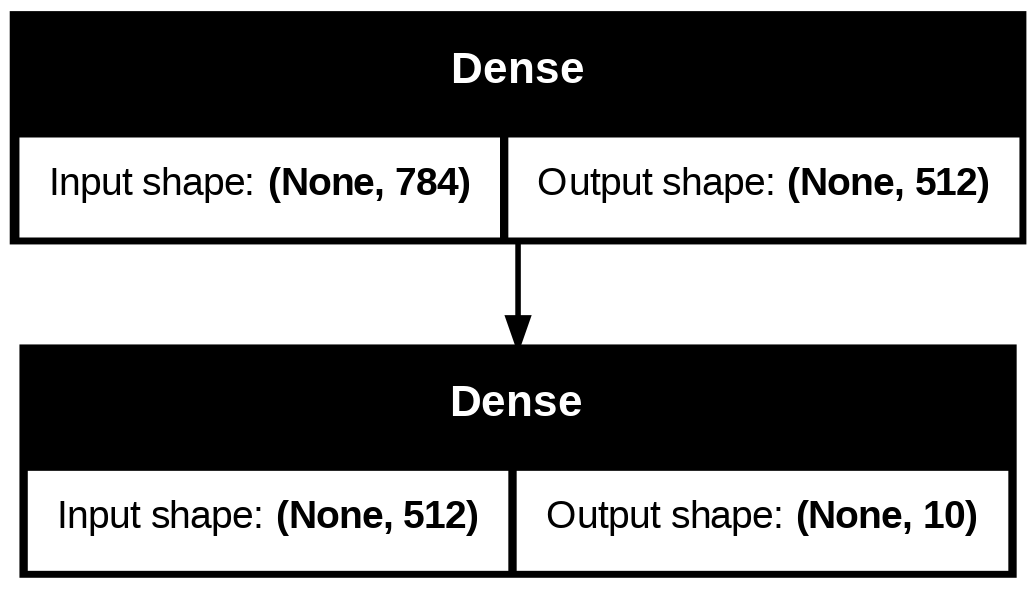

In [12]:
# Visualizing the architecture of the model with its layers
utils.plot_model(model, show_shapes=True)

In [13]:
# Train the model with training data and validate with testing data store in history with 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9009 - loss: 0.3375 - val_accuracy: 0.9658 - val_loss: 0.1056
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9750 - loss: 0.0813 - val_accuracy: 0.9751 - val_loss: 0.0852
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9892 - loss: 0.0327 - val_accuracy: 0.9788 - val_loss: 0.0689
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9820 - val_loss: 0.0676
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.9800 - val_loss: 0.0759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9803 - val_loss: 0.0748
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9955 - loss: 

* From Training accuracy we got 99% and validation accuracy we got 98% without overfitting, but validation loss is in dilation decreasing to increasing then to decreasing.

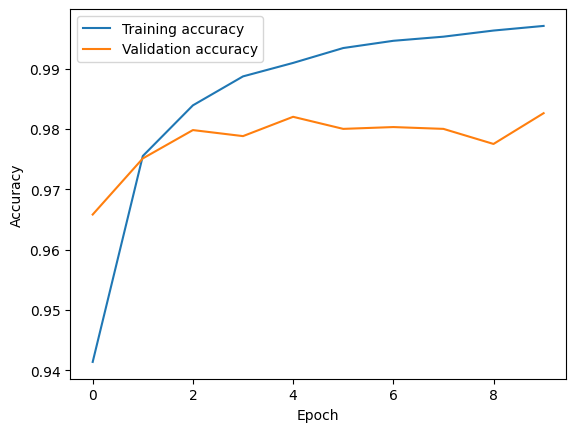

In [14]:
# Visualize the training and validation loss
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

3. From question 2, for the hidden layer set the hidden layer size as [2,4,6,8,10], show the accuracies on the test set.

In [15]:
# Hidden layer sizes to test
hidden_layer_sizes = [2, 4, 6, 8, 10]

# Dictionary to store the training history for each hidden layer size
history_dict = {}

for size in hidden_layer_sizes:
    # Build the MLP model with the specified hidden layer size
    model = models.Sequential([
        layers.Dense(size, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 'size' units
        layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # Store the history in the dictionary
    history_dict[size] = history.history

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Hidden Layer Size: {size}, Test Accuracy: {test_accuracy:.4f}')

Hidden Layer Size: 2, Test Accuracy: 0.6339
Hidden Layer Size: 4, Test Accuracy: 0.8607
Hidden Layer Size: 6, Test Accuracy: 0.9013
Hidden Layer Size: 8, Test Accuracy: 0.9196
Hidden Layer Size: 10, Test Accuracy: 0.9323


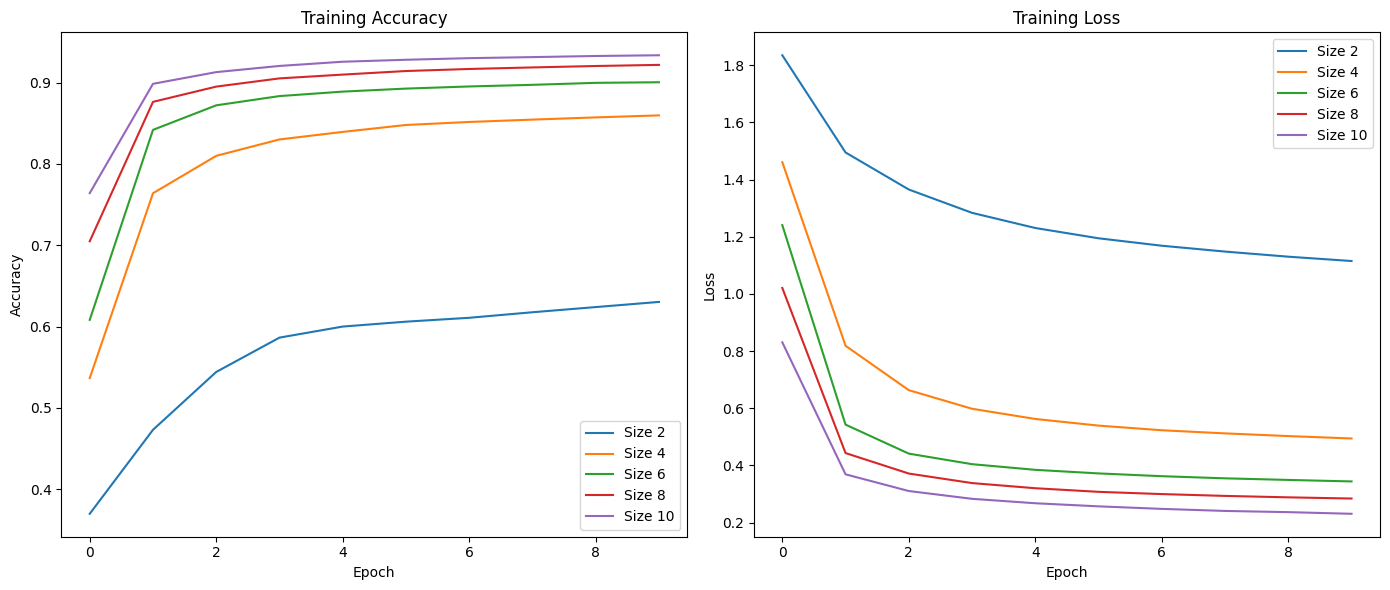

In [16]:
# Plot accuracy and loss for each hidden layer size
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
for size in hidden_layer_sizes:
    plt.plot(history_dict[size]['accuracy'], label=f'Size {size}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for size in hidden_layer_sizes:
    plt.plot(history_dict[size]['loss'], label=f'Size {size}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### 4. From question 2, for the hidden layer set the hidden layer size as [50, 100, 150, 200], show the accuracies on the test set

In [17]:
# Hidden layer sizes to test
hidden_layer_sizes = [50,100,150,200]

# Dictionary to store the training history for each hidden layer size
history_dict = {}

for size in hidden_layer_sizes:
    # Build the MLP model with the specified hidden layer size
    model = models.Sequential([
        layers.Dense(size, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 'size' units
        layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # Store the history in the dictionary
    history_dict[size] = history.history

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Hidden Layer Size: {size}, Test Accuracy: {test_accuracy:.4f}')

Hidden Layer Size: 50, Test Accuracy: 0.9699
Hidden Layer Size: 100, Test Accuracy: 0.9734
Hidden Layer Size: 150, Test Accuracy: 0.9775
Hidden Layer Size: 200, Test Accuracy: 0.9784


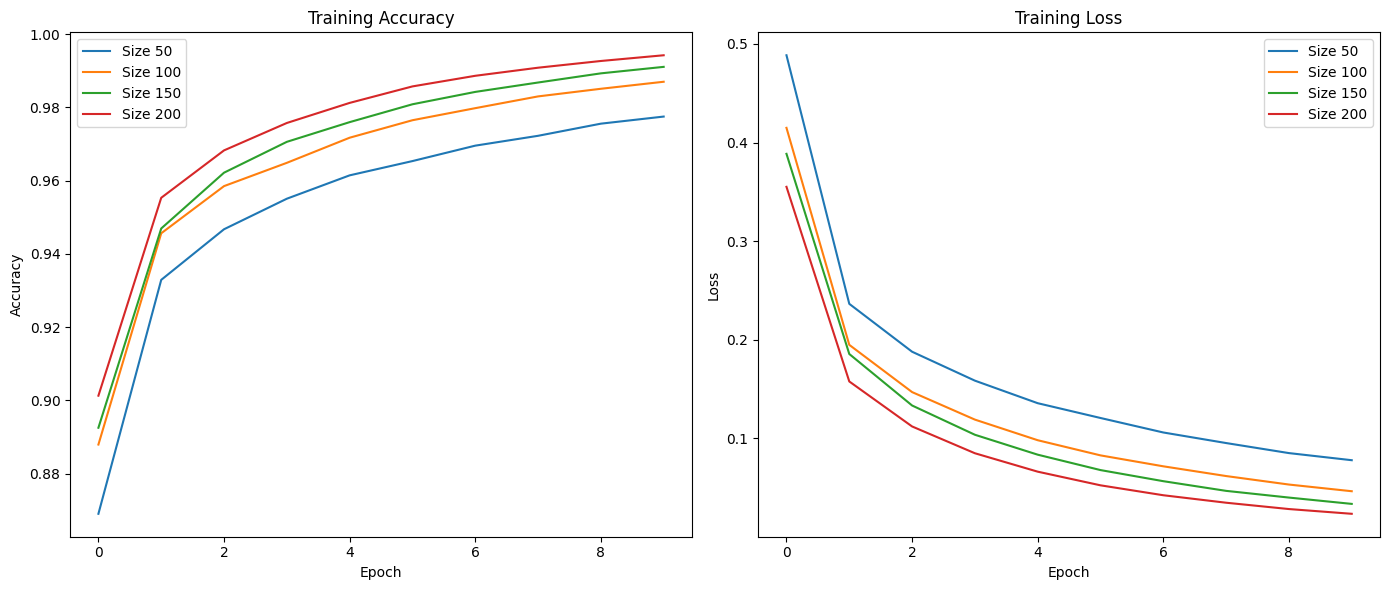

In [18]:
# Plot accuracy and loss for each hidden layer size
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
for size in hidden_layer_sizes:
    plt.plot(history_dict[size]['accuracy'], label=f'Size {size}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for size in hidden_layer_sizes:
    plt.plot(history_dict[size]['loss'], label=f'Size {size}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### 5. Based on question 3 and 4, explain the key findings

1) From 3rd question let's see test accuracies with their hidden layer sizes

- Hidden Layer Size: 2, Test Accuracy: 0.6339
- Hidden Layer Size: 4, Test Accuracy: 0.8607
- Hidden Layer Size: 6, Test Accuracy: 0.9013
- Hidden Layer Size: 8, Test Accuracy: 0.9196
- Hidden Layer Size: 10, Test Accuracy: 0.9323

From this observation from the size of 2 hidden layers it got accuracy around 63% which is not better performance, if it is increased by 2 layers the model performed better, it has gradual increase in accuracy such as 4 layers - 86%, 6 layers - 90%, 8 layers - 91%, 10 layers - 93%.

2) From the 4th question let's see test accuracies with their hidden layer sizes

- Hidden Layer Size: 50, Test Accuracy: 0.9699
- Hidden Layer Size: 100, Test Accuracy: 0.9734
- Hidden Layer Size: 150, Test Accuracy: 0.9775
- Hidden Layer Size: 200, Test Accuracy: 0.9784

From this observation of hidden layers sizes for 50 hidden layers it got accuracy around 96% it is a better performance, if the hidden layers increase by adding 50 more layers as 100 layers the accuarcy increased to 97% and for 150 layers - 97%, 200 layers - 97%, not that much increment but got similar accuracies around 97% which is the better performance.


**Conclusion:**

The key findings from the both observation if we add more layers such 50 the accuracy will be slight increase in the model performance. Suggested gradual increase in the layers leads to better performance in the model.




## References:

1) K. Team, “Keras documentation: MNIST digits classification dataset,” keras.io. https://keras.io/api/datasets/mnist/
